In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
timeInterval = 0.01 

# Array of numpy arrays. Each inner array contains length between 2 points on a sheet.
length_arrays = []

file_paths = [
    '/kaggle/input/sparkdata/Lab5CSV/resultsSheet1.csv',
    '/kaggle/input/sparkdata/Lab5CSV/resultsSheet2.csv',
    '/kaggle/input/sparkdata/Lab5CSV/resultsSheet4.csv',
    '/kaggle/input/sparkdata/Lab5CSV/resultsSheet5.csv',
    '/kaggle/input/sparkdata/Lab5CSV/resultsSheet6.csv',
    '/kaggle/input/sparkdata/Lab5CSV/resultsSheet7.csv',
    '/kaggle/input/sparkdata/Lab5CSV/resultsSheet8.csv'
]

for file_path in file_paths:
    df = pd.read_csv(file_path)
    length = df.iloc[:, 6].values 
    length_arrays.append(length)


In [3]:
#length_arrays[1] is messed up because I forgot to set the scale
length_arrays[1]

array([124.278, 121.202, 176.139, 162.151, 178.869, 161.009, 158.07 ,
       120.208, 203.769, 159.85 , 163.267, 140.471, 165.855, 138.192,
       176.819])

In [4]:
# Just gotta divide each entry by ~ 78.28 px / cm 
length_arrays[1] = [round(entry/78.28, 3) for entry in length_arrays[1]]
length_arrays[1]
# !!! Dont re-run this cell alone; it will perform the division again !!!

[1.588,
 1.548,
 2.25,
 2.071,
 2.285,
 2.057,
 2.019,
 1.536,
 2.603,
 2.042,
 2.086,
 1.794,
 2.119,
 1.765,
 2.259]

In [5]:
# get the magnitude of the velocity between two points
# in cm/s
velocity_array = []

for array in length_arrays:
    velocity = [(entry/timeInterval) for entry in array]
    velocity_array.append(np.array(velocity))

In [6]:
velocity_array[2]

array([102.1, 151.4, 114.6, 134.8, 104.6, 136.7,  88.1, 133.8, 121.3,
       125.6, 105.1, 128.9, 132.4, 131.4, 129.7, 113.9, 128.6, 135.3,
       165.1, 132.4,  90.7])

In [7]:
# Trial plot 
# a = v^2/R vs v
radius = 14.113

a1 = np.array([round((v**2)/radius, 3) for v in velocity_array[0]])

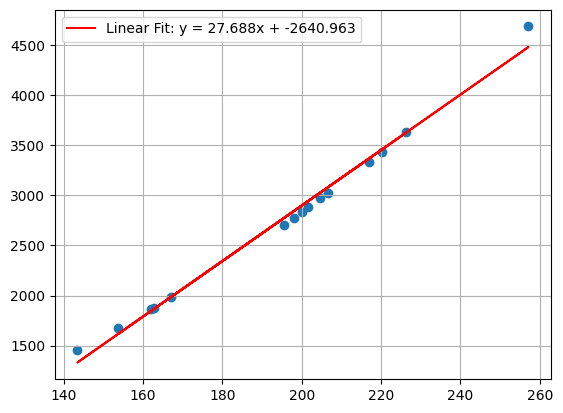

In [8]:
plt.scatter(velocity_array[0], a1)

coefficients = np.polyfit(velocity_array[0], a1, 1)
slope, intercept = coefficients

plt.plot(velocity_array[0], slope * velocity_array[0] + intercept, color='red', label=f'Linear Fit: y = {slope:.3f}x + {intercept:.3f}')
plt.legend()
plt.grid()
plt.show()